<a href="https://colab.research.google.com/github/yagipong/Logsitic_Random_Forest_KNN/blob/main/Logistic%2C_Random_Forest%2C_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic, Random Forest, or KNN

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
path = '/content/drive/MyDrive/CD_DS/2_Machine_Learning/Week_3/Assignments/Core/wisconsinBreastCancer - wisconsinBreastCancer.csv'
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Logistic Regression Model

In [67]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

In [68]:
X = df[['concave points_worst']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [69]:
logreg = LogisticRegression(C = 1000)
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1000))])

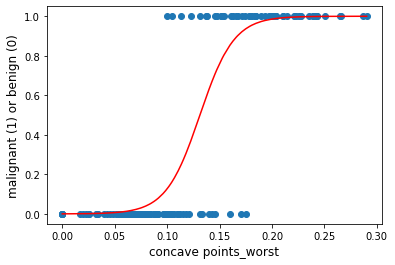

In [70]:
plot_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'], 'diagnosis': y_test})
plot_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
plot_df = plot_df.sort_values(['logistic_preds'])

plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(plot_df['worst_concave_points'], plot_df['logistic_preds'].values, color = 'red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize =12);

In [71]:
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.9084507042253521
0.9090909090909091


In [72]:
logreg_pipe_pred = logreg_pipe.predict(X_test)
logreg_pipe_accuracy = accuracy_score(y_test, logreg_pipe_pred)
print(logreg_pipe_accuracy)

0.9090909090909091


In [73]:
logreg_pipe_recall = recall_score(y_test,logreg_pipe_pred)
print(logreg_pipe_recall)

0.9074074074074074


In [74]:
logreg_pipe_precision = precision_score(y_test,logreg_pipe_pred)
print(logreg_pipe_precision)

0.8596491228070176


###L1 Regularization

In [75]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

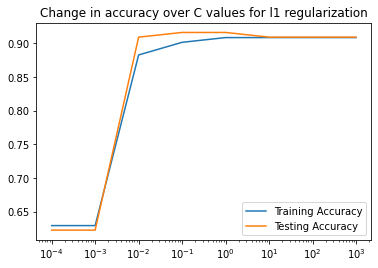

In [76]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.set_xscale('log')

In [77]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6223776223776224,
 0.001: 0.6223776223776224,
 0.01: 0.9090909090909091,
 0.1: 0.916083916083916,
 1: 0.916083916083916,
 10: 0.9090909090909091,
 100: 0.9090909090909091,
 1000: 0.9090909090909091}

###L2 Regularization

In [78]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

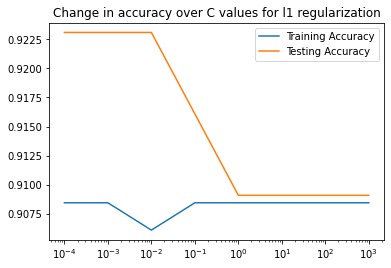

In [79]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.set_xscale('log')

In [80]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9230769230769231,
 0.001: 0.9230769230769231,
 0.01: 0.9230769230769231,
 0.1: 0.916083916083916,
 1: 0.9090909090909091,
 10: 0.9090909090909091,
 100: 0.9090909090909091,
 1000: 0.9090909090909091}

##KNN Model

In [81]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [82]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [83]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [84]:
predictions = knn_pipe.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [85]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9230769230769231

In [86]:
knn_accuracy = accuracy_score(y_test, predictions)
knn_recall = recall_score(y_test, predictions)
knn_precision = precision_score(y_test, predictions)

print(knn_accuracy)
print(knn_recall)
print(knn_precision)

0.9230769230769231
0.9074074074074074
0.8909090909090909


###KNN tuning

In [87]:
accuracy_score,
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

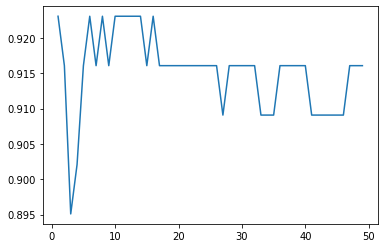

Best K value = 1
Best accuracy on the test set = 0.9230769230769231


In [88]:
plt.plot(krange, test_accuracies, label = 'Test K Scores')
plt.show()

print(f'Best K value = {bestk}')
print(f'Best accuracy on the test set = {bestacc}')

##Random Forest Model

In [89]:
rf = RandomForestRegressor(random_state= 42)

In [90]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [91]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
rf.predict(X_test)

array([0.        , 1.        , 0.96      , 0.        , 0.        ,
       1.        , 1.        , 0.73      , 1.        , 0.        ,
       0.        , 0.94      , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.509     , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.64      , 0.        , 0.        , 1.        ,
       0.        , 0.01      , 0.        , 0.22      , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.01      , 1.        , 0.03178571, 0.        , 0.        ,
       0.01      , 0.02      , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.25      , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.3       ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.35      , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.     

In [93]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9140602711949648
0.6964142556859199


###Random Tree Tuning - max depth and n_estimators

####Max Depth Tuning

In [94]:
est_depths = [estimator.get_depth()for estimator in rf.estimators_]

In [95]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index = depths, columns = ['Test Score'])
for depth in depths:
  model = RandomForestRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
  scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
  
scores.head()

,Test Score,Train Score
1,0.701503,0.706542
2,0.727605,0.741747
3,0.721861,0.764269
4,0.722883,0.789757
5,0.718618,0.821650


In [96]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending = False)
sorted_scores.head()

,Test Score,Train Score
2,0.727605,0.741747
4,0.722883,0.789757
3,0.721861,0.764269
5,0.718618,0.821650
6,0.716166,0.853745


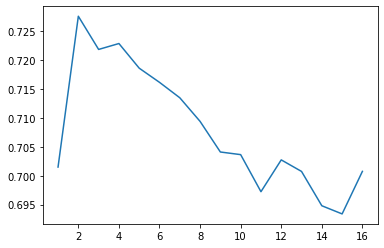

In [97]:
plt.plot(scores['Test Score']);

####n_estimators Tuning

In [98]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index = n_ests, columns = ['Test Score', 'Train Score'])
for n in n_ests:
  model = RandomForestRegressor(max_depth = 29, n_estimators = n)
  model.fit(X_train, y_train)
  scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
  scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)

scores2.head()

,Test Score,Train Score
50,0.689085,0.914549
100,0.698989,0.917156
150,0.699186,0.914972
200,0.701278,0.916385
250,0.70032,0.916545


In [99]:
sorted_scores2 = scores2.sort_values(by = 'Test Score', ascending= False)
sorted_scores2.head()

,Test Score,Train Score
200,0.701278,0.916385
250,0.70032,0.916545
150,0.699186,0.914972
100,0.698989,0.917156
50,0.689085,0.914549


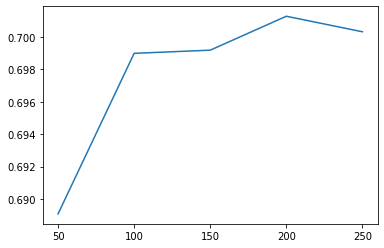

In [100]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

##Final Questions

1. Which hyperparameters did you tune for each of the models?


For the L1 and L2 regularizations of the logistic regression model, I tuned the C hyperparameter. For the KNN model, I tuned k, the number of neighbors. For the random forest model, I tuned the max depth and the number of estimators.

2. Which model would you put into production to diagnose malignant tumors?

I would use the tuned KNN model to diagnose malignant tumors because this model produces the highest scores on accuracy and precision of all the models tested.

3. How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case?

In this case, the best model is the one that minimizes false negatives. To save the most lives, doctors should overprescribe trestment for cancer rather than underprescribe.